In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab material/DL Dataset/Practical 2/mnist_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab material/DL Dataset/Practical 2/mnist_test.csv")

In [4]:
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_train, y_train = train_data.drop("label", axis=1), train_data.label.values

In [7]:
x_train = x_train/255
x_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [9]:
x_test, y_test = test_data.drop("label", axis=1), test_data.label.values

In [10]:
x_test = x_test/255
x_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [12]:
28 * 28

784

In [13]:
input_shape = (28, 28, 1)
batch_size = 32
kernel_size = 3
latent_dim = 16
layer_filters = [32, 64]

In [29]:
inputs = keras.layers.Input(shape=input_shape, name='encoder_input')
x = inputs

# Stack of Conv2D layers
for filters in layer_filters:
    x = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', strides=2, padding='same')(x)

# Save encoder shape and flatten before latent vector
encoder_shape = keras.backend.int_shape(x)
x = keras.layers.Flatten()(x)
latent = keras.layers.Dense(latent_dim, name='latent_vector', activity_regularizer=keras.regularizers.l1(1e-6))(x)

# Define encoder model
encoder = keras.Model(inputs, latent, name='encoder')

# Decoder model
latent_inputs = keras.layers.Input(shape=(latent_dim,), name='decoder_input')
x = keras.layers.Dense(encoder_shape[1] * encoder_shape[2] * encoder_shape[3])(latent_inputs)
x = keras.layers.Reshape((encoder_shape[1], encoder_shape[2], encoder_shape[3]))(x)

# Stack of Conv2DTranspose layers
for filters in layer_filters[::-1]:
    x = keras.layers.Conv2DTranspose(filters=filters, kernel_size=kernel_size, activation='relu', strides=2, padding='same')(x)

# Final output layer for reconstruction
outputs = keras.layers.Conv2DTranspose(filters=1,kernel_size=kernel_size, activation='sigmoid', padding='same', name='decoder_output')(x)

# Define decoder model
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# Full autoencoder model: connect encoder and decoder
autoencoder = keras.Model(inputs, decoder(encoder(inputs)), name='autoencoder')


In [30]:
# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [31]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 16)                  │          69,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 28, 28, 1)           │         108,993 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,001 (695.32 KB)

 Trainable params: 178,001 (695.32 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
x_train = x_train.to_numpy().reshape(x_train.shape[0],28,28,1)

In [17]:
x_test = x_test.to_numpy().reshape(x_test.shape[0],28,28,1)

In [18]:
x_train.shape

(60000, 28, 28, 1)

In [32]:
report = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 205ms/step - accuracy: 0.8031 - loss: 0.0749
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 203ms/step - accuracy: 0.8123 - loss: 0.0142
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 200ms/step - accuracy: 0.8133 - loss: 0.0117
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - accuracy: 0.8134 - loss: 0.0104
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 198ms/step - accuracy: 0.8136 - loss: 0.0096
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.8143 - loss: 0.0091
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 206ms/step - accuracy: 0.8139 - loss: 0.0086
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - accuracy: 0.8144 - loss: 0.0083
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.8141 - loss: 0.0081
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 203ms/step - accuracy: 0.8139 - loss: 0.0079


In [33]:
autoencoder.evaluate(x_test, x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8206 - loss: 0.0077


[0.007661004550755024, 0.8132771849632263]

In [34]:
results = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


In [ ]:
results.shape

<ipython-input-36-8295a1a0ee6f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,a+1)


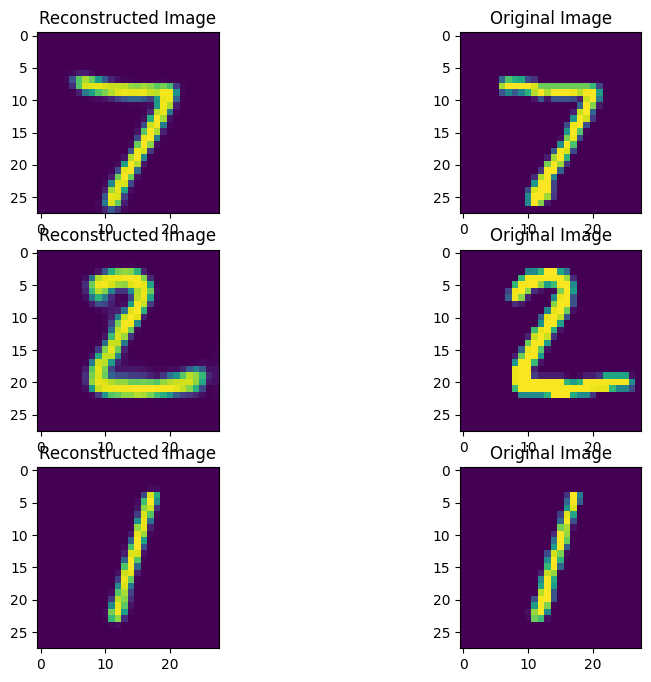

In [36]:
plt.figure(figsize=(10,8))
plt.grid(False)

counter = 0
for a in range(0,6):
  plt.subplot(3,2,a+1)
  if a % 2 == 0:
    plt.title("Reconstructed Image")
    plt.imshow(results[counter].reshape(28,28))
  else:
    plt.title("Original Image")
    plt.imshow(x_test[counter].reshape(28,28))
    counter += 1

<ipython-input-38-54ae57a8893f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


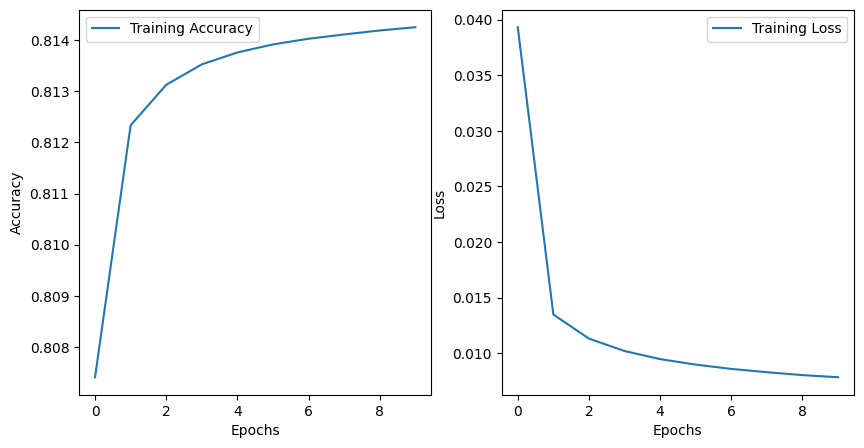

In [38]:
plt.figure(figsize=(10,5))
plt.title("Model Performance")
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(report.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.plot(report.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()